In [1]:
# Importing the libraries 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats


In [2]:
df = pd.read_csv('ProjectTweets.csv')
# looking at the dataset
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
df.rename(columns={'0': 'number','1467810369':'id','Mon Apr 06 22:19:45 PDT 2009': 'date','NO_QUERY': 'flag','_TheSpecialOne_': 'user' }, inplace=True)



In [4]:
df.head()

,number,id,date,flag,user,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
new_column_name = 'text'
df.rename(columns={df.columns[5]: new_column_name}, inplace=True)

df.head()

,number,id,date,flag,user,text
0,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,5,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df['flag'].value_counts()

flag
NO_QUERY    1599999
Name: count, dtype: int64

In [7]:
df=df.drop(columns=['number','id', 'flag'])
df.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


In [8]:
# Text transformation to lowercase
df['text'] =df['text'].str.lower()
df['text']

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1599999, dtype: object

In [9]:
# URL removal from text
df['text'] = df['text'].apply(lambda x:re.sub(r"http\S+", "", x))
df["text"]

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: text, Length: 1599999, dtype: object

In [10]:
import string

In [11]:
# Punctuation from text
punctuation_removal = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', punctuation_removal))
df["text"] = df["text"].apply(lambda text: remove_punctuation(text))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichan i dived many times for the ball manag...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom  very cool to hear old walt intervie...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [12]:
# Single character and double space removal from the text
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [13]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df["text"] = df["text"].apply(str)
df["text"] = df["text"].apply(remove_emoji)
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [14]:
# Single character and double space removal from text
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df["text"] = df["text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df["text"]

0          is upset that he cant update his facebook by t...
1          kenichandived many times for the ball managed ...
2            my whole body feels itchy and like its on fire 
3          nationwideclass no its not behaving at all im ...
4                               kwesidei not the whole crew 
                                 ...                        
1599994    just woke up having no school is the best feel...
1599995    thewdbcom very cool to hear old walt interview...
1599996    are you ready for your mojo makeover ask me fo...
1599997    happy 38th birthday to my boo of alll time tup...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1599999, dtype: object

In [15]:
# Most common words in the text
from collections import Counter
cnt = Counter()
for text in df["text"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('to', 556063),
 ('the', 517438),
 ('my', 312073),
 ('you', 263475),
 ('and', 263066),
 ('it', 223549),
 ('is', 223104),
 ('in', 197411),
 ('for', 195146),
 ('of', 176815)]

In [16]:
df_new=df
df_new.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by t...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichandived many times for the ball managed ...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im ...
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei not the whole crew


In [17]:
df_new.user.value_counts()

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
                  ... 
iheartrobpattz       1
67trinity            1
Sibby                1
mAnyA_15             1
bpbabe               1
Name: count, Length: 659775, dtype: int64

In [18]:
# df_new.to_csv('df_new.txt', sep='\t', index=False)

We will calculate the frequency of occurrence of users in the 'user' column of the dataframe df_new 
and display the top 10 most frequently occurring users along with their tweet counts.

In [19]:
# top 10 users
from collections import Counter
cnt = Counter()
for text in df_new["user"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('lost_dog', 549),
 ('webwoke', 345),
 ('tweetpet', 310),
 ('SallytheShizzle', 281),
 ('VioletsCRUK', 279),
 ('mcraddictal', 276),
 ('tsarnick', 248),
 ('what_bugs_u', 246),
 ('Karen230683', 238),
 ('DarkPiano', 236)]

In [20]:
top_10_users = cnt.most_common(10)

In [21]:
top_10_users = pd.DataFrame(top_10_users, columns=["User", "Tweet count"])

# Table output
print(top_10_users)

              User  Tweet count
0         lost_dog          549
1          webwoke          345
2         tweetpet          310
3  SallytheShizzle          281
4      VioletsCRUK          279
5      mcraddictal          276
6         tsarnick          248
7      what_bugs_u          246
8      Karen230683          238
9        DarkPiano          236


In [22]:
top_10_users.head(10)

,User,Tweet count
0,lost_dog,549
1,webwoke,345
2,tweetpet,310
3,SallytheShizzle,281
4,VioletsCRUK,279
5,mcraddictal,276
6,tsarnick,248
7,what_bugs_u,246
8,Karen230683,238
9,DarkPiano,236


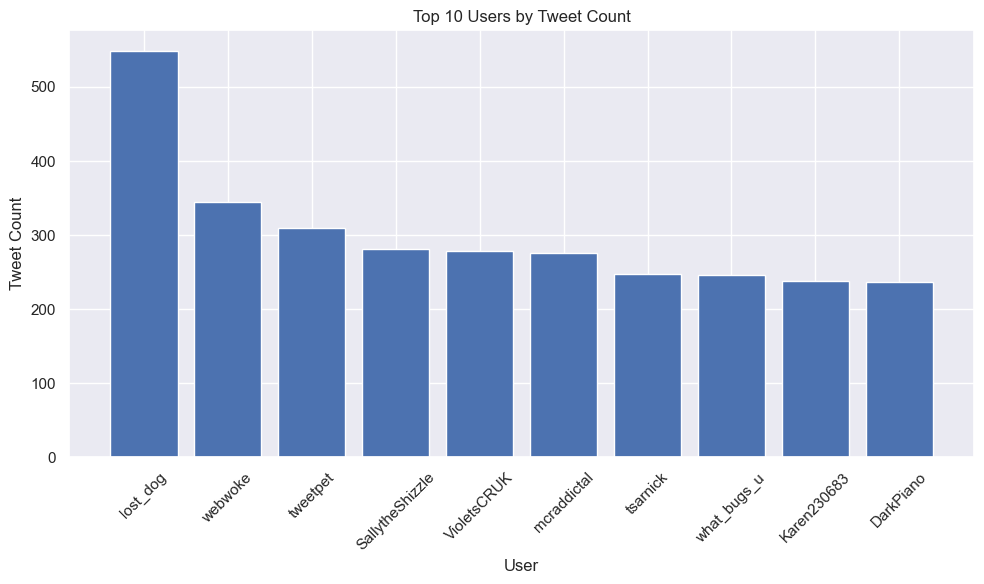

In [23]:
# Getting Data for a Graph
user_counts = cnt.most_common(10)
users = [user[0] for user in user_counts]
tweet_counts = [user[1] for user in user_counts]

# Creating a Graph
plt.figure(figsize=(10, 6))
plt.bar(users, tweet_counts)
plt.xlabel("User")
plt.ylabel("Tweet Count")
plt.title("Top 10 Users by Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()

# Graph display
plt.show()





In [24]:
#msno.matrix(df) 

#no missing data found in dataframe

In [25]:
df_new.head()

,date,user,text
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by t...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichandived many times for the ball managed ...
2,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im ...
4,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei not the whole crew


In [26]:
# Convert date column to datetime format
df_new['date'] = pd.to_datetime(df_new['date']).dt.date 

In [27]:
df_new.head()

,date,user,text
0,2009-04-06,scotthamilton,is upset that he cant update his facebook by t...
1,2009-04-06,mattycus,kenichandived many times for the ball managed ...
2,2009-04-06,ElleCTF,my whole body feels itchy and like its on fire
3,2009-04-06,Karoli,nationwideclass no its not behaving at all im ...
4,2009-04-06,joy_wolf,kwesidei not the whole crew


In [28]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alyona_dushkina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alyona_dushkina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
#stopwords are the words which won't bring about any changes to the polarity of the tweet
stop_words = stopwords.words('english')   
len(stop_words),stop_words[5:10]

(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [30]:
# function to remove stopwords
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
# clean_tweet = " ".join(lemmatizer.lemmatize(word) for word in clean_tweet.split())
  return clean_tweet

In [31]:
df_new['text'] = df_new['text'].apply(lambda x: stopWords(x))

In [32]:
df_new.head()

,date,user,text
0,2009-04-06,scotthamilton,upset cant update facebook texting might cry a...
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...
2,2009-04-06,ElleCTF,whole body feels itchy like fire
3,2009-04-06,Karoli,nationwideclass behaving im mad amhere because...
4,2009-04-06,joy_wolf,kwesidei whole crew


In [33]:
from textblob import TextBlob
# Function to assign polarity and subjectivity to the tweets
def blob_fun(text):
  senti = TextBlob(text)
  senti_polarity = senti.sentiment.polarity
  senti_subjectivity = senti.sentiment.subjectivity

  if senti_polarity > 0:
    res = 'Positive'

  elif senti_polarity < 0:
    res = 'Negative'

  elif senti_polarity == 0:
    res ="Neutral"

  result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

  return result

The "blob_fun" function calculates the polarity and subjectivity of a tweet using the TextBlob and returns the sentiment result as 'Positive' (positive), 'Negative' (negative) or 'Neutral' (neutral) along with the polarity and subjectivity values.

In [34]:
df_new['results'] = df_new['text'].apply(blob_fun)

#after executing this line of code, DataFrame df_new will contain a new "results" column, 
#in which each row will contain a dictionary with sentiment and subjectivity analysis results 
#for the corresponding text (tweet) from the "text" column.


### As a result, DataFrame df_sentiment will contain all columns from DataFrame df_new, as well as new columns with sentiment and subjectivity analysis results for each text (tweet). 
#### Now there will be a complete DataFrame with information about the texts and their sentiment analysis

In [35]:
df_sentiment = df_new.join(pd.json_normalize(data=df_new['results']))


In [36]:
df_sentiment.head()

,date,user,text,results,polarity,subjectivity,sentiment
0,2009-04-06,scotthamilton,upset cant update facebook texting might cry a...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.0,Neutral
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.500,0.5,Positive
2,2009-04-06,ElleCTF,whole body feels itchy like fire,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,Positive
3,2009-04-06,Karoli,nationwideclass behaving im mad amhere because...,"{'polarity': -0.625, 'subjectivity': 1.0, 'sen...",-0.625,1.0,Negative
4,2009-04-06,joy_wolf,kwesidei whole crew,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,Positive


# An analysis of changes in sentiment over a period of time.

In [37]:
df = pd.get_dummies(df_sentiment, columns = ['sentiment'], prefix = '', drop_first=False)
# Cast columns to integer type (int)
df['_Positive'] = df['_Positive'].astype(int)
df['_Negative'] = df['_Negative'].astype(int)
df['_Neutral'] = df['_Neutral'].astype(int)

df.head()

,date,user,text,results,polarity,subjectivity,_Negative,_Neutral,_Positive
0,2009-04-06,scotthamilton,upset cant update facebook texting might cry a...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.0,0,1,0
1,2009-04-06,mattycus,kenichandived many times ball managed save 50 ...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.500,0.5,0,0,1
2,2009-04-06,ElleCTF,whole body feels itchy like fire,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,0,0,1
3,2009-04-06,Karoli,nationwideclass behaving im mad amhere because...,"{'polarity': -0.625, 'subjectivity': 1.0, 'sen...",-0.625,1.0,1,0,0
4,2009-04-06,joy_wolf,kwesidei whole crew,"{'polarity': 0.2, 'subjectivity': 0.4, 'sentim...",0.200,0.4,0,0,1


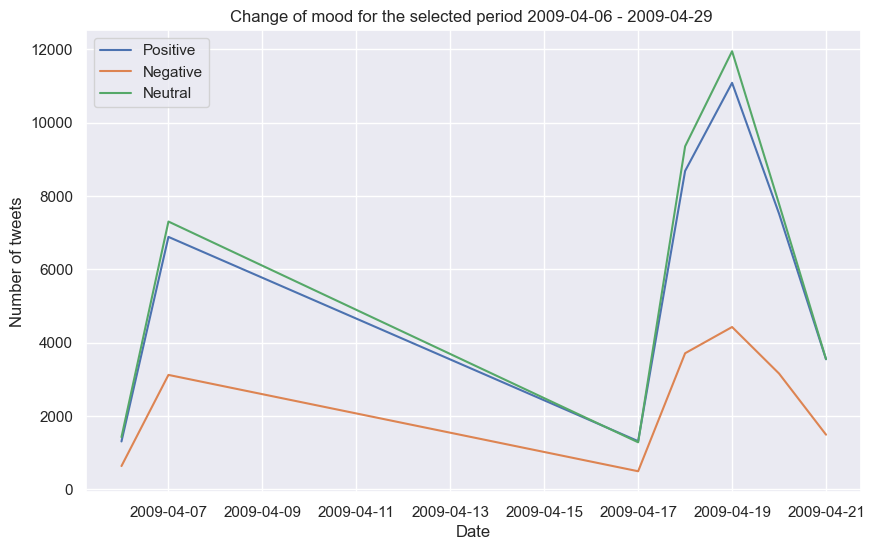

In [38]:
df['date'] = pd.to_datetime(df['date'])

# Set the selected time period
start_date = pd.to_datetime('2009-04-06')
end_date = pd.to_datetime('2009-04-29')

# Filtering a DataFrame by a selected time period
df_selected_period = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Group by date and count the number of tweets for each mood value
df_grouped = df_selected_period.groupby('date')[['_Positive', '_Negative', '_Neutral']].sum().reset_index()

# Building a graph of sentiment changes for a selected period
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['date'], df_grouped['_Positive'], label='Positive')
plt.plot(df_grouped['date'], df_grouped['_Negative'], label='Negative')
plt.plot(df_grouped['date'], df_grouped['_Neutral'], label='Neutral')
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Change of mood for the selected period 2009-04-06 - 2009-04-29 ')
plt.legend()
plt.grid(True)
plt.show()



## Сonclusion: During the selected period, there is a significant increase in positive and neutral tweets on April 19, 2009. On the other hand, on April 17, 2009, we see relatively low activity.

In [39]:
df_sentiment["sentiment"].value_counts() 

sentiment
Neutral     689148
Positive    614630
Negative    296221
Name: count, dtype: int64

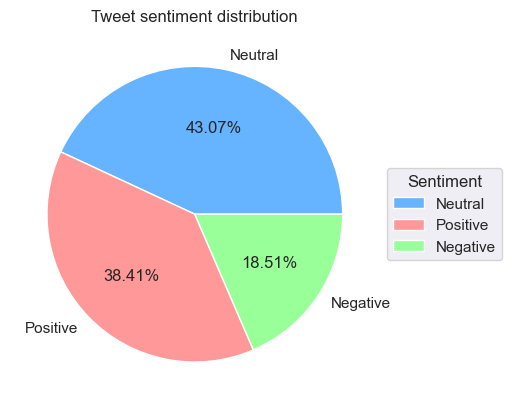

In [40]:
# Define colors for pie chart segments
colors = ['#66b3ff', '#ff9999', '#99ff99']

# Creating a Pie Chart
ax = df_sentiment['sentiment'].value_counts().plot.pie(autopct='%.2f%%', colors=colors)

# Adding a title
plt.title('Tweet sentiment distribution')

# Set the distance between segments and their captions
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend(title='Sentiment', loc='center left', bbox_to_anchor=(1.0, 0, 0.5, 1))

# Pie Chart Display
plt.show()

Upsampling to compensate for category imbalance. The category imbalance problem occurs when one label appears more often than others. In such a situation, classifiers tend to be overwhelmed by large classes and ignore small ones.

When applied to our tweet dataset, we notice an imbalance between the classes. For the same reason, our model may tend to be neutral. An unmanaged category imbalance would make our model simplistic and inaccurate.

In [41]:
# Divide the DataFrame into separate classes
df_positive = df_sentiment[df_sentiment['sentiment'] == 'Positive']
df_negative = df_sentiment[df_sentiment['sentiment'] == 'Negative']
df_neutral = df_sentiment[df_sentiment['sentiment'] == 'Neutral']

# Determine the size of the majority class (neutral tweets)
majority_size = df_neutral.shape[0]

# Generate random indexes for upsampling positive and negative tweets
random_indices_positive = np.random.choice(df_positive.index, size=majority_size, replace=True)
random_indices_negative = np.random.choice(df_negative.index, size=majority_size, replace=True)

# Get new DataFrame for positive and negative tweets
df_positive_upsampled = df_positive.loc[random_indices_positive]
df_negative_upsampled = df_negative.loc[random_indices_negative]

# Merge all DataFrame back into one DataFrame with new tweets added
df_upsampled = pd.concat([df_neutral, df_positive_upsampled, df_negative_upsampled])

# Shuffle data for variety
df_upsampled = df_upsampled.sample(frac=1).reset_index(drop=True)

# Let's check the results
print(df_upsampled["sentiment"].value_counts())

sentiment
Positive    689148
Neutral     689148
Negative    689148
Name: count, dtype: int64


With upsampling, you risk overfitting by repeating the same tweets over and over again. But if your dataset is large enough, this shouldn't be a problem.

<Axes: ylabel='count'>

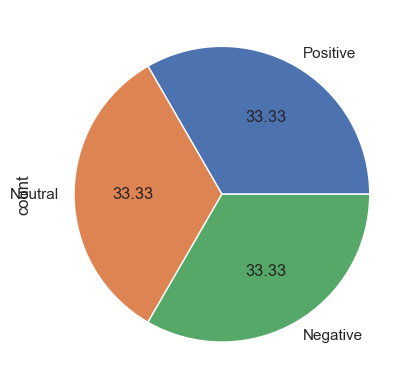

In [42]:
df_upsampled['sentiment'].value_counts().plot.pie(autopct= '%.2f')

In [43]:
df_upsampled.head()

,date,user,text,results,polarity,subjectivity,sentiment
0,2009-06-05,ShoeSmitten,interested write fashionshoes 1 post many send...,"{'polarity': 0.375, 'subjectivity': 0.5, 'sent...",0.375,0.5,Positive
1,2009-05-09,youngscolla,ambduckett,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.0,Neutral
2,2009-05-17,CarolineC12,malcomdaughtercant wait either ill prob end go...,"{'polarity': -0.5, 'subjectivity': 1.0, 'senti...",-0.500,1.0,Negative
3,2009-06-14,kflofosho55,watchingmovie rents party animalsam also choco...,"{'polarity': 0.7, 'subjectivity': 0.6000000000...",0.700,0.6,Positive
4,2009-06-07,emma09ashley,sam doesnt havefavorite song,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000,0.0,Neutral


In [44]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067444 entries, 0 to 2067443
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   user          object 
 2   text          object 
 3   results       object 
 4   polarity      float64
 5   subjectivity  float64
 6   sentiment     object 
dtypes: float64(2), object(5)
memory usage: 110.4+ MB


### 7/30/90 day sentiment forecast for a specific user

### As we defined earlier, "lost_dog" is the most active user from our dataframe

In [45]:
df_lost_dog = df_upsampled[df_upsampled['user'] == 'lost_dog']
df_lost_dog.head()

,date,user,text,results,polarity,subjectivity,sentiment
2833,2009-05-29,lost_dog,chantelnicoleam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
2981,2009-06-23,lost_dog,lauraandrudyam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
10311,2009-06-17,lost_dog,ponyryderam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
11968,2009-05-18,lost_dog,meepbobeepam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral
30800,2009-06-19,lost_dog,hosslassam lost please help findgood home,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.0,0.0,Neutral


In [46]:
df_lost_dog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 2833 to 2061244
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          549 non-null    object 
 1   user          549 non-null    object 
 2   text          549 non-null    object 
 3   results       549 non-null    object 
 4   polarity      549 non-null    float64
 5   subjectivity  549 non-null    float64
 6   sentiment     549 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.3+ KB


In [47]:
df_lost_dog["sentiment"].value_counts()

sentiment
Neutral    549
Name: count, dtype: int64

#### Conclusion: It is not possible to predict a good, bad or neutral tweet for a specific user for 7 days, as it is critical to have enough data to train the model so that it is adequate and accurate.
In our case, for the user "lost_dog" there are too few tweets and they are all neutral (549/549).

# Predict the total number of tweets for all users for 7, 30 and 90 days ahead

In [48]:
df_all=df_upsampled

In [49]:
df_all['date'] = pd.to_datetime(df_all['date'])
tweets_per_day = df_all.groupby(df_all['date'].dt.date)['text'].count()
tweets_per_day = pd.DataFrame(tweets_per_day)
tweets_per_day.head()

,text
date,
2009-04-06,4477
2009-04-07,22283
2009-04-17,3865
2009-04-18,27984
2009-04-19,34538


In [50]:
# df_all.to_csv('file2.csv')

It is important to make sure that the time series is stationary before applying forecasting methods. During the analysis phase, you can perform stationarity tests, such as the Dickey-Fuller test, to verify that the series is stationary, or apply differentiation methods to stabilize the series, if necessary.

In [51]:
from statsmodels.tsa.stattools import adfuller


In [52]:
# Dickey-Fuller test (ADF)
result = adfuller(tweets_per_day)

# Output of results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -3.5777837548590314
p-value: 0.006200237719966796
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064


Conclusions: 
In this case, ADF-statistic (-3.5773818190927917) is less than all critical values (-3.5778480370438146, -2.925338105429433, -2.6007735310095064) 
and p-value (0.006208455957551 378) is less than the selected significance level (for example, 0.05). 
This means that we can reject the null hypothesis that there is a unit root and consider the time series to be stationary.

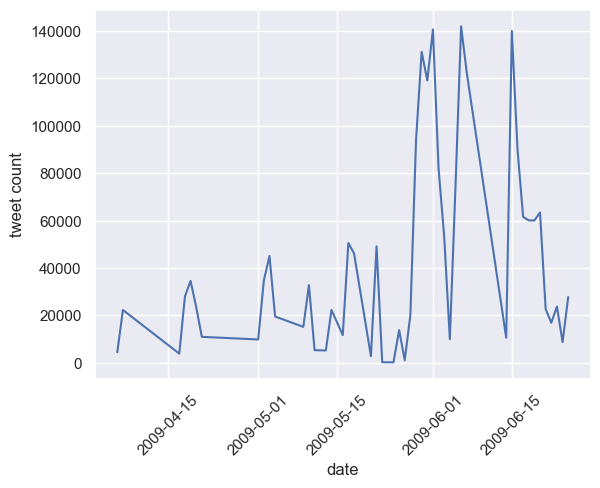

In [53]:
tweets_per_day.rename(columns={'text': 'tweet count'},inplace=True)
sns.set()
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.plot(tweets_per_day.index, tweets_per_day['tweet count'], )
plt.show()


#Thus, the code analyzes and visualizes the number of tweets (tweet count) by day on a line chart with appropriate axes and labels.

In [54]:
train = tweets_per_day[tweets_per_day.index < pd.to_datetime("2009-06-01").date()]
test = tweets_per_day[tweets_per_day.index >= pd.to_datetime("2009-06-01").date()]
test

,tweet count
date,
2009-06-01,140594
2009-06-02,81877
2009-06-03,53206
2009-06-04,9984
2009-06-05,74248
2009-06-06,141940
2009-06-07,122405
2009-06-14,10597
2009-06-15,139990


So after running this code, the test variable will contain tweets from June 1, 2009 and after that date, and the train variable will contain tweets before June 1, 2009, which will be used to train the model. This allows us to test how well our model predicts tweets given new data that was not used in the training process.

/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.10265D+00    |proj g|=  6.77847D-03

At iterate    5    f=  9.10255D+00    |proj g|=  1.75223D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   2.278D-06   9.103D+00
  F =   9.1025446765756630     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


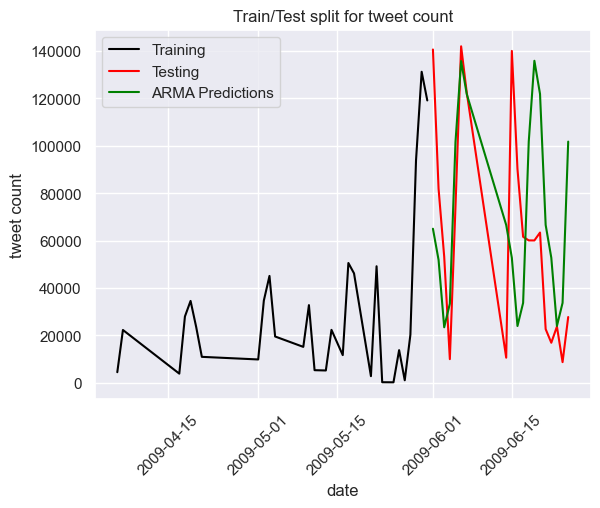

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['tweet count']

ARMAmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(0, 1, 0, 7))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for tweet count")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Прогноз количества твитов')

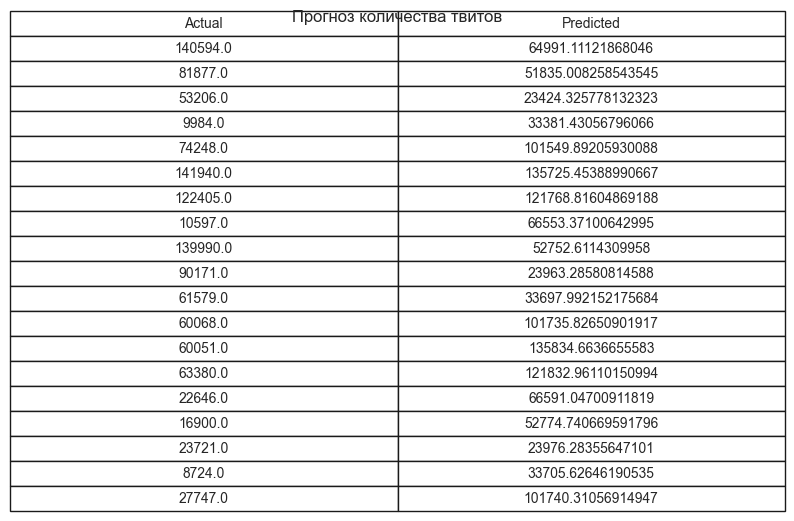

In [56]:
# Создаем таблицу с прогнозами и реальными значениями
forecast_table = pd.DataFrame({'Actual': test['tweet count'], 'Predicted': y_pred_outARMA})
forecast_table.index.name = 'Date'

# Создаем информационную панель для прогноза
fig, ax = plt.subplots(figsize=(10, 6))

# Построение таблицы
ax.axis('off')
table = ax.table(cellText=forecast_table.values, colLabels=forecast_table.columns, cellLoc='center', loc='center')

# Устанавливаем размер шрифта для текста в таблице
table.auto_set_font_size(False)
table.set_fontsize(10)

# Масштабируем таблицу
table.scale(1, 1.5)

# Отображение заголовка таблицы
ax.set_title('Прогноз количества твитов')


In [57]:
train = tweets_per_day[tweets_per_day.index < pd.to_datetime("2009-06-01").date()]
test = tweets_per_day[tweets_per_day.index >= pd.to_datetime("2009-06-01").date()]
test

,tweet count
date,
2009-06-01,140594
2009-06-02,81877
2009-06-03,53206
2009-06-04,9984
2009-06-05,74248
2009-06-06,141940
2009-06-07,122405
2009-06-14,10597
2009-06-15,139990


/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


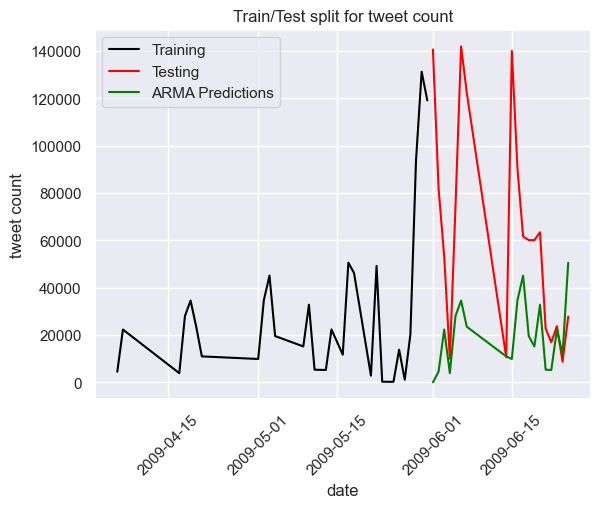

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['tweet count']

ARMAmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(0, 1, 0, 30))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for tweet count")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Прогноз количества твитов')

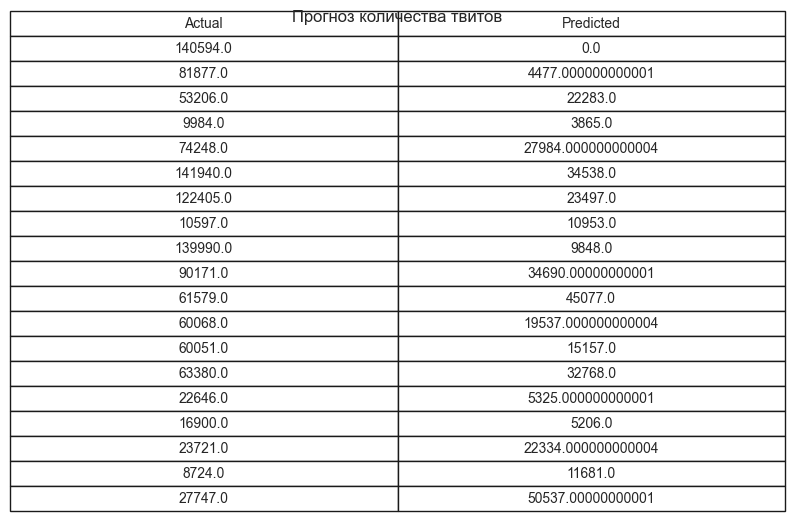

In [59]:
# Создаем таблицу с прогнозами и реальными значениями
forecast_table = pd.DataFrame({'Actual': test['tweet count'], 'Predicted': y_pred_outARMA})
forecast_table.index.name = 'Date'

# Создаем информационную панель для прогноза
fig, ax = plt.subplots(figsize=(10, 6))

# Построение таблицы
ax.axis('off')
table = ax.table(cellText=forecast_table.values, colLabels=forecast_table.columns, cellLoc='center', loc='center')

# Устанавливаем размер шрифта для текста в таблице
table.auto_set_font_size(False)
table.set_fontsize(10)

# Масштабируем таблицу
table.scale(1, 1.5)

# Отображение заголовка таблицы
ax.set_title('Прогноз количества твитов')


/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Users/alyona_dushkina/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


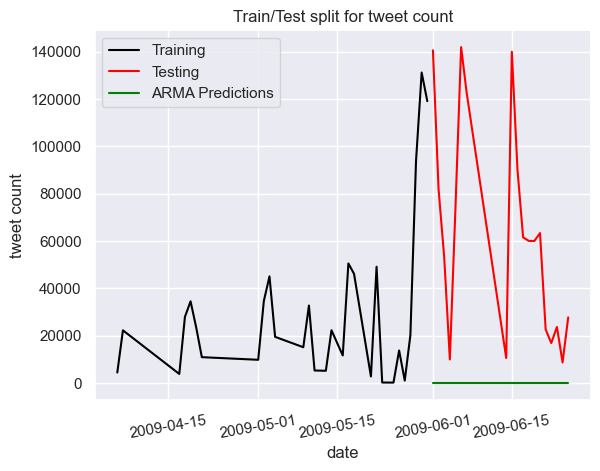

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y = train['tweet count']

ARMAmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(0, 1, 0, 90))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], 
                                             end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_outARMA = y_pred_df["Predictions"] 

plt.plot(train, color = "black", label = 'Training')
plt.plot(test, color = "red", label = 'Testing')
plt.ylabel('tweet count')
plt.xlabel('date')
plt.xticks(rotation=10)
plt.title("Train/Test split for tweet count")
plt.plot(y_pred_outARMA, color='green', label = 'ARMA Predictions')
plt.legend()
plt.show()